In [13]:
#Description: this program predicts the price of FB stock for a specific day
#             using the Machine Learning algorithm called
#             Support Vector Regression (SVR) Model
#           https://www.youtube.com/watch?v=tMPfZV_ipOg

In [14]:
# Import the packages
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('FB-30.csv')
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,194.779999,196.179993,193.009995,193.029999,193.029999,15996600
1,2019-05-02,193.000000,194.000000,189.750000,192.529999,192.529999,13209500
2,2019-05-03,194.380005,196.160004,193.710007,195.470001,195.470001,14575400
3,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
4,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
5,2019-05-08,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
6,2019-05-09,187.199997,189.770004,186.259995,188.649994,188.649994,12967000


In [16]:
#Create the lists / X and Y data set
dates = []
prices = []

In [17]:
#Get the number of rows and columns in the data set
df.shape

(21, 7)

In [18]:
#Print the last row of data
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
20,2019-05-30,183.080002,183.479996,180.889999,183.009995,183.009995,8581500


In [19]:
#Get all of the data exept for the last row
df = df.head(len(df)-1)
print(df.shape)

(20, 7)


In [20]:
df_dates = df.loc[:,'Date'] # get all of the rows from the date column
df_open = df.loc[:,'Open']  # get all of the rows from the Open column

In [21]:
#Create the independent data set 'X' as dates
for date in df_dates:
  dates.append( [int(date.split('-')[2])] )
  
#Create the dependent data set 'y' as prices
for open_price in df_open:
  prices.append(float(open_price))


In [22]:
#See what days were recorded in the data set
print (dates)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29]]


In [25]:
#Function to make predictions - taking 3 parameters - x = date on which prediction has to be made
def predict_prices(dates, prices, x):
  
  #Creating 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
  #Training the models based on parameters provided
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)
  #Create the linear regression model
  lin_reg = LinearRegression()
  #Train the Linear Regression Model
  lin_reg.fit(dates,prices)
  
  # Plotting the models on a graph
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.plot(dates, svr_lin.predict(dates), color = 'blue', label='Linear model')
  plt.plot(dates, svr_poly.predict(dates), color = 'green', label='Polynomial model')
  plt.plot(dates,lin_reg.predict(dates),color = 'orange',label='Linear Regl')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  # Returning the predicted models
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


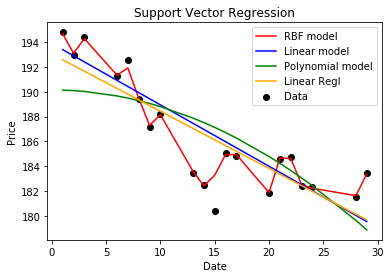

(187.08890736754125, 179.0599973332093, 178.08891011400308, 179.21816766916643)


In [26]:
#Predict the price of FB on day 31
predicted_price = predict_prices(dates, prices, [[30]])

# Now displaying the model
print(predicted_price)